In [82]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import os
import sklearn.metrics
import matplotlib.pyplot as plt
import tsfel
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [83]:
# Load the .npy files from the parent directory
X_train = np.load(os.path.join('..', 'Saved_Dataset', 'X_train.npy'))
y_train = np.load(os.path.join('..', 'Saved_Dataset', 'y_train.npy'))

X_test = np.load(os.path.join('..', 'Saved_Dataset', 'X_test.npy'))
y_test = np.load(os.path.join('..', 'Saved_Dataset', 'y_test.npy'))

In [84]:
linear_acc_train = np.sqrt(X_train[:,:,0]**2 + X_train[:,:,1]**2 + X_train[:,:,2]**2)
linear_acc_test = np.sqrt(X_test[:,:,0]**2 + X_test[:,:,1]**2 + X_test[:,:,2]**2)
print(linear_acc_test.shape)

(54, 500)


In [85]:
y_pred=[]
model=[]
for i in range(2,9):
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(linear_acc_train,y_train)
    model.append(dt)
    y_pred.append(dt.predict(linear_acc_test))

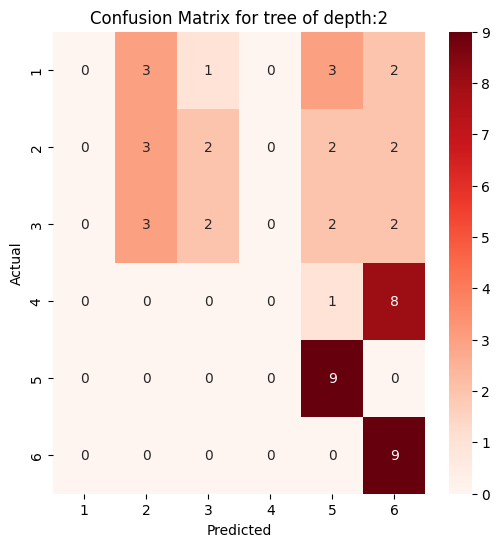

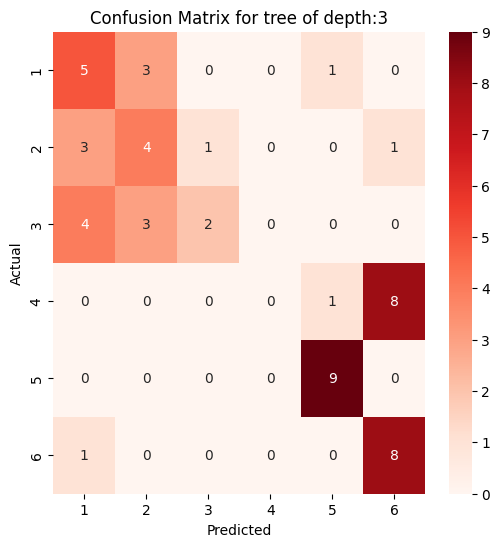

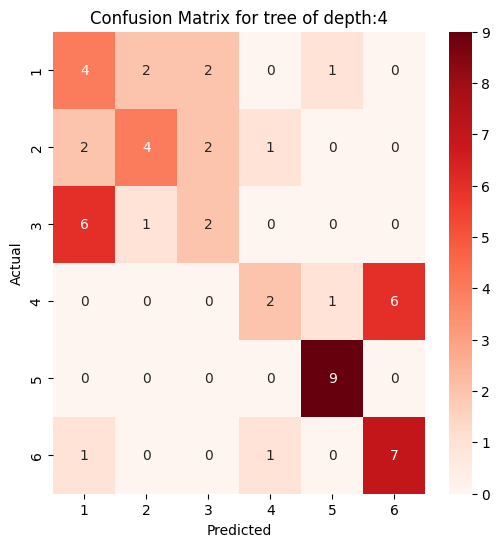

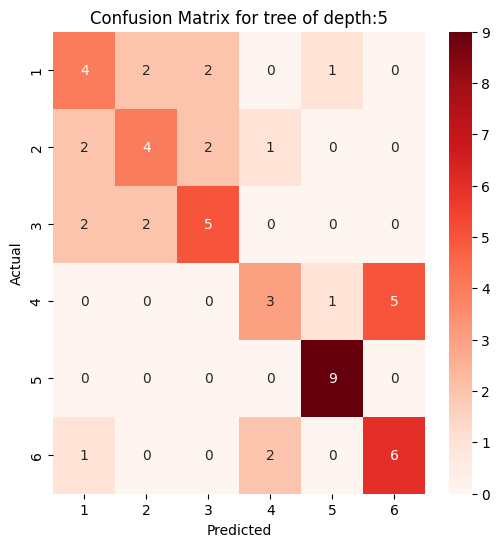

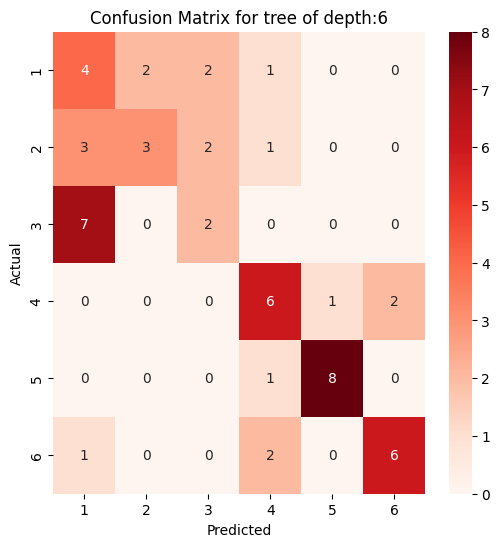

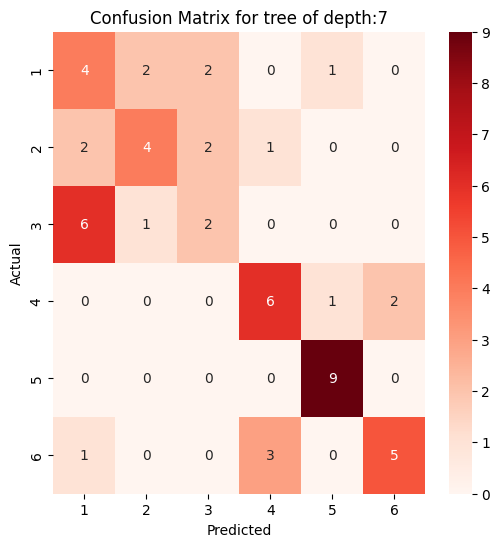

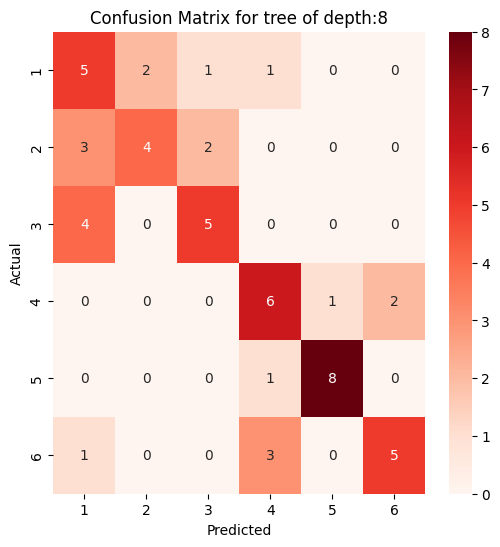

In [86]:
for i in range(0,7):
    cm = confusion_matrix(y_test,y_pred[i])
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=range(1, 7), yticklabels=range(1, 7))
    plt.title('Confusion Matrix for tree of depth:'+str(i+2))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [87]:
max_a=[tsfel.feature_extraction.features.calc_max(linear_acc_train[i]) for i in range(len(linear_acc_train))]
min_a=[tsfel.feature_extraction.features.calc_min(linear_acc_train[i]) for i in range(len(linear_acc_train))]
mean=[tsfel.feature_extraction.features.calc_mean(linear_acc_train[i]) for i in range(len(linear_acc_train))]
median=[tsfel.feature_extraction.features.calc_median(linear_acc_train[i]) for i in range(len(linear_acc_train))]
std=[tsfel.feature_extraction.features.calc_std(linear_acc_train[i]) for i in range(len(linear_acc_train))]
X_tsfel_train=np.array([mean,median,std,max_a,min_a]).transpose()
print(X_tsfel_train.shape)

(126, 5)


In [88]:
max_a=[tsfel.feature_extraction.features.calc_max(linear_acc_test[i]) for i in range(len(linear_acc_test))]
min_a=[tsfel.feature_extraction.features.calc_min(linear_acc_test[i]) for i in range(len(linear_acc_test))]
mean=[tsfel.feature_extraction.features.calc_mean(linear_acc_test[i]) for i in range(len(linear_acc_test))]
median=[tsfel.feature_extraction.features.calc_median(linear_acc_test[i]) for i in range(len(linear_acc_test))]
std=[tsfel.feature_extraction.features.calc_std(linear_acc_test[i]) for i in range(len(linear_acc_test))]
X_tsfel_test=np.array([mean,median,std,max_a,min_a]).transpose()
print(X_tsfel_train.shape)

(126, 5)


In [89]:
y_tsfel_pred=[]
model_tsfel=[]
for i in range(2,9):
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(X_tsfel_train,y_train)
    model_tsfel.append(dt)
    y_tsfel_pred.append(dt.predict(X_tsfel_test))

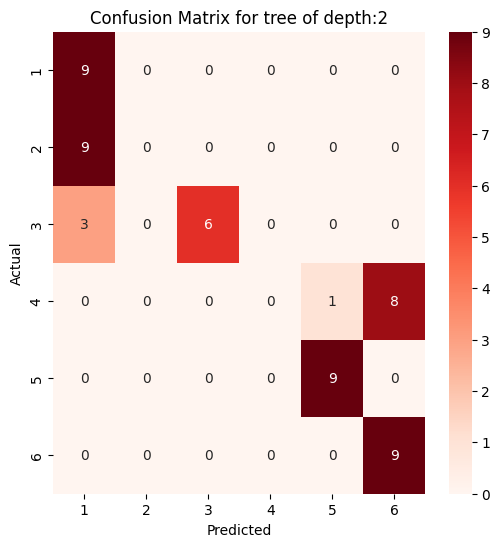

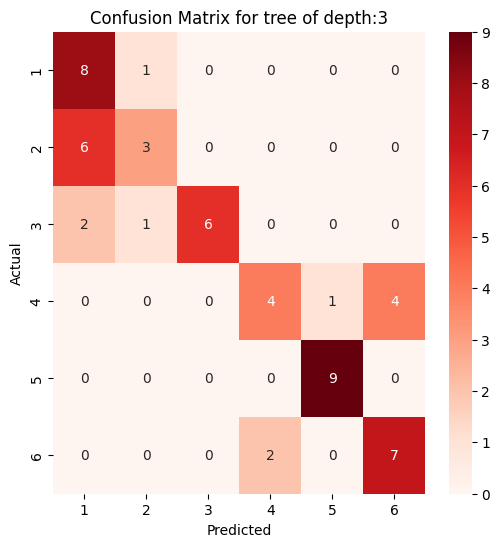

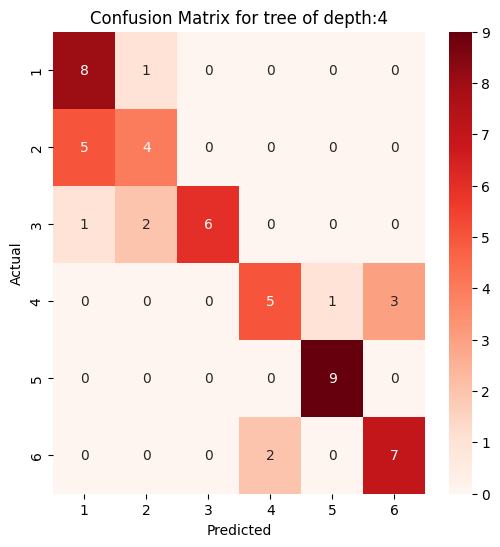

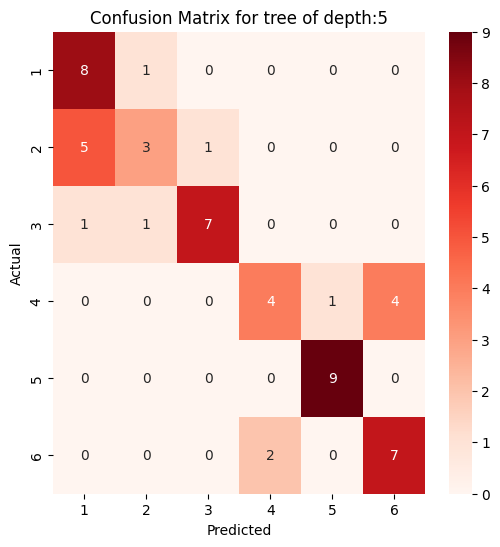

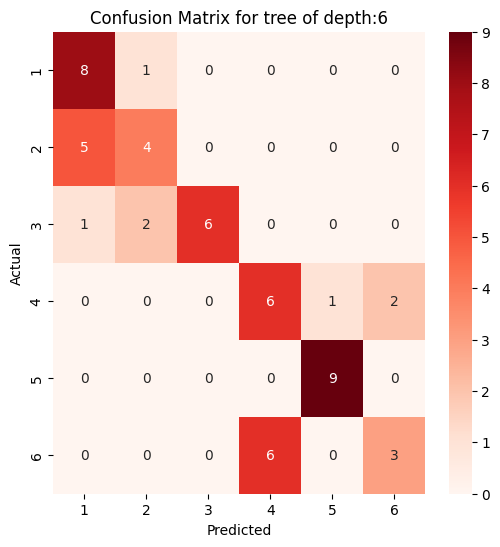

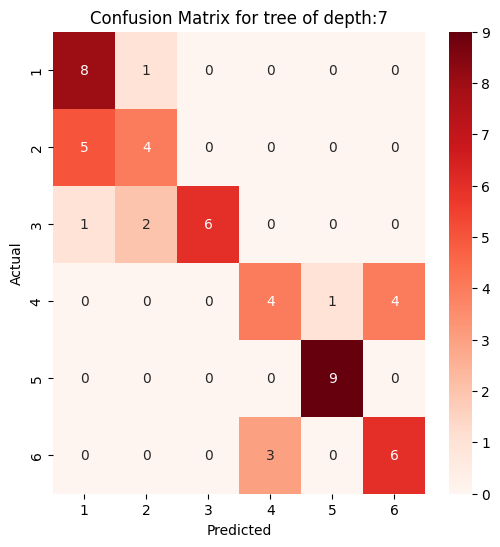

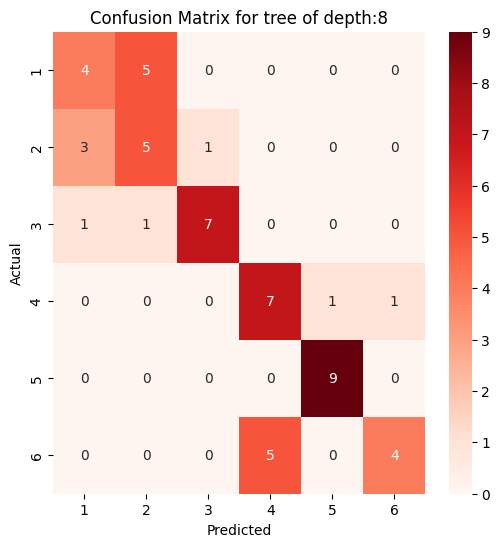

In [90]:
for i in range(0,7):
    cm = confusion_matrix(y_test,y_tsfel_pred[i])
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=range(1, 7), yticklabels=range(1, 7))
    plt.title('Confusion Matrix for tree of depth:'+str(i+2))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()